<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 4</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

movies = pd.read_csv('blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *Main_Genre*: primarni žanr filma
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: duljina filma u minutama
- *rank_in_year*: rank među 10 najboljih filmova objavljenih te godine
- *rating*: ocjena publike
- *studio*: studio koji je producirao film
- *title*: naslov filma
- *worldwide_gross*: ukupni svjetski prihod u dolarima
- *year*: godina izdanja


## Vizualizacija jedne varijable

- Prvo ćemo vidjeti kako vizualizirati jednu varijablu koristeći biblioteku matplotlib. Usredotočimo se na stupac "Worldwide gross revenue" datafremea i pregledajmo distribuciju pomoću histograma i boxplota.
- Primijetite korištenje plt.xlabel(), plt.ylabel(), plt.title() - svaka vizualizacija treba imati označenu os i naslov!
- plt.hist() uzima nekoliko važnih argumenata: bins - broj binova i range - raspon vrijednosti razmatranih u histogramu

Text(0.5, 1.0, 'Gross revenue, histogram')

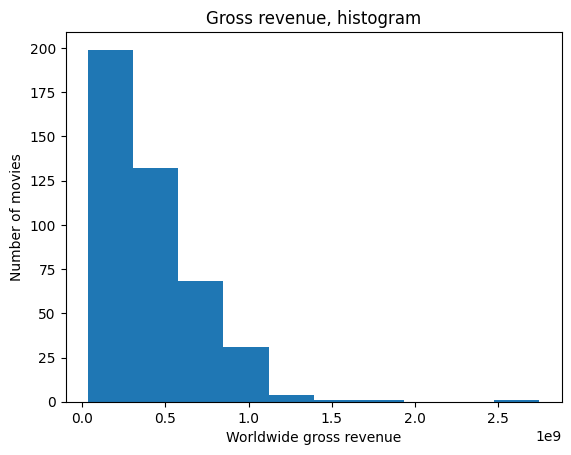

In [30]:
 plt.hist(movies['worldwide_gross'].values)

 plt.xlabel('Worldwide gross revenue')
 plt.ylabel('Number of movies')
 plt.title('Gross revenue, histogram')

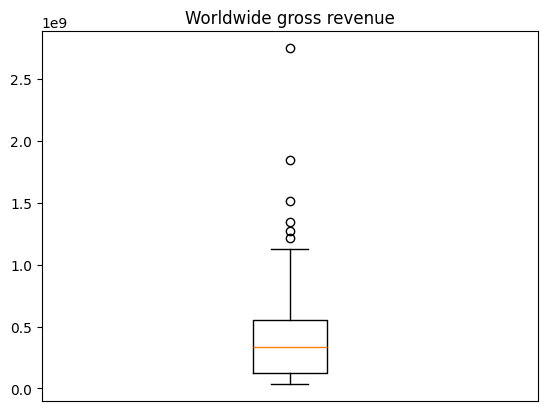

In [31]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Vizualizacija dviju kontinuiranih varijabli

- Hoće li filmski hitovi s višom gledanošću ostvariti više prihoda!
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

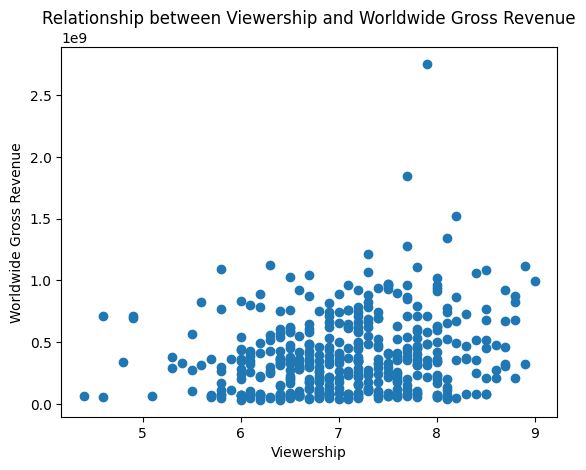

In [ ]:
#scatter
plt.scatter(movies['imdb_rating'], movies['worldwide_gross'])

# Add labels and title
plt.xlabel('Viewership')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Relationship between Viewership and Worldwide Gross Revenue')

# Show the plot
plt.show()

- Pokušat ćemo markere učiniti manjim određivanjem malog parametra veličine "s".

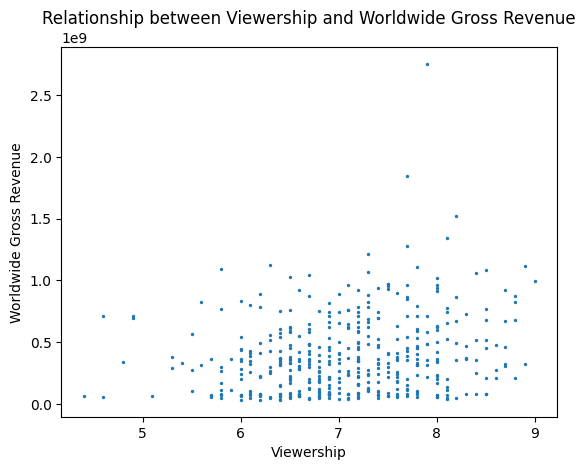

In [34]:
# scatter sa s=2
plt.scatter(movies['imdb_rating'], movies['worldwide_gross'], s=2)  # Set the marker size to 2

# Add labels and title
plt.xlabel('Viewership')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Relationship between Viewership and Worldwide Gross Revenue')

# Show the plot
plt.show()

Scatterplot nisu korisni kada je broj točaka vrlo velik jer ih postaje teško protumačiti. Seaborn nudi mnoge alternativne učinkovite načine vizualizacije.

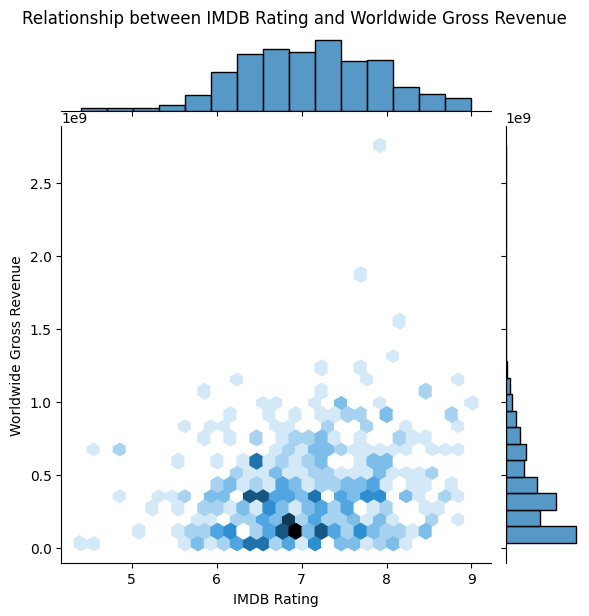

In [35]:
# jointplot sa kind="hex"
import seaborn as sns

# Create a joint plot with hex bins to examine the relationship between IMDB rating and worldwide gross revenue
sns.jointplot(x='imdb_rating', y='worldwide_gross', data=movies, kind='hex', gridsize=30)

# Add labels and title
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross Revenue')
plt.suptitle('Relationship between IMDB Rating and Worldwide Gross Revenue', y=1.02)

# Show the plot
plt.show()

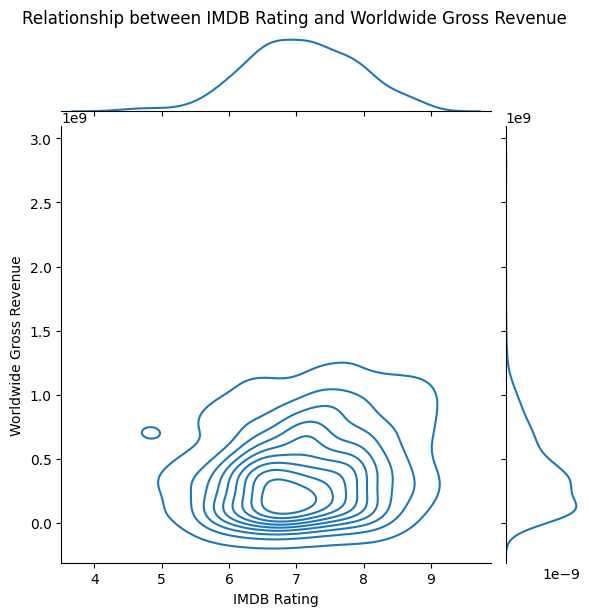

In [36]:
# jointplot sa kind="kde"

# Create a joint plot with KDE to examine the relationship between IMDB rating and worldwide gross revenue
sns.jointplot(x='imdb_rating', y='worldwide_gross', data=movies, kind='kde')

# Add labels and title
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross Revenue')
plt.suptitle('Relationship between IMDB Rating and Worldwide Gross Revenue', y=1.02)

# Show the plot
plt.show()


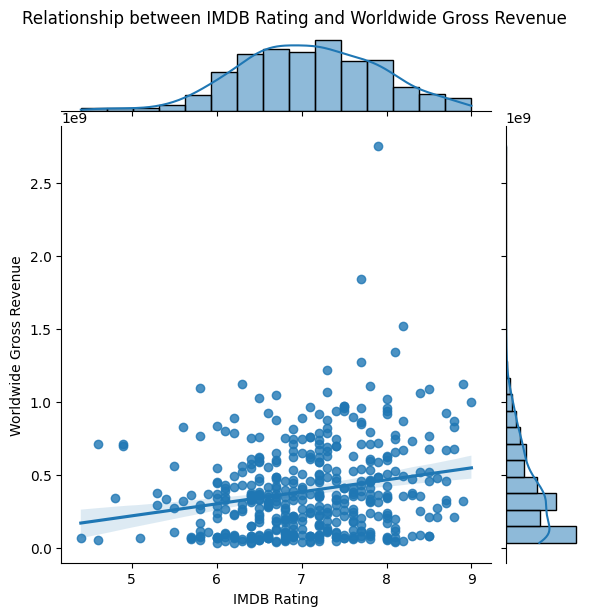

In [38]:
# jointplot sa kind="reg"

# Create a joint plot with regression to examine the relationship between IMDB rating and worldwide gross revenue
sns.jointplot(x='imdb_rating', y='worldwide_gross', data=movies, kind='reg')

# Add labels and title
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross Revenue')
plt.suptitle('Relationship between IMDB Rating and Worldwide Gross Revenue', y=1.02)

# Show the plot
plt.show()

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo pet najzastupljenijih žanrova i ispitajmo prihode
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

In [41]:
top_genres = movies['Main_Genre'].value_counts().nlargest(5).index
top_movies = movies[movies['Main_Genre'].isin(top_genres)]


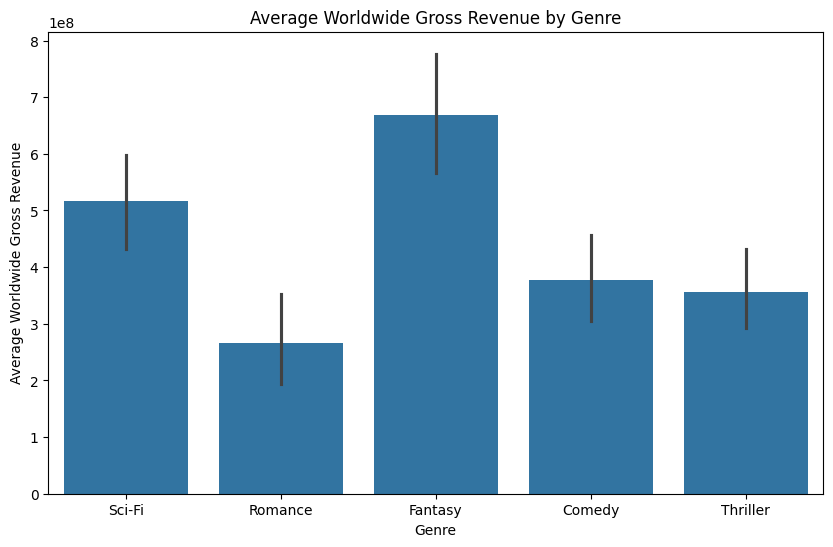

In [43]:
# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Main_Genre', y='worldwide_gross', data=top_movies, estimator=np.mean)
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross Revenue')
plt.title('Average Worldwide Gross Revenue by Genre')
plt.show()

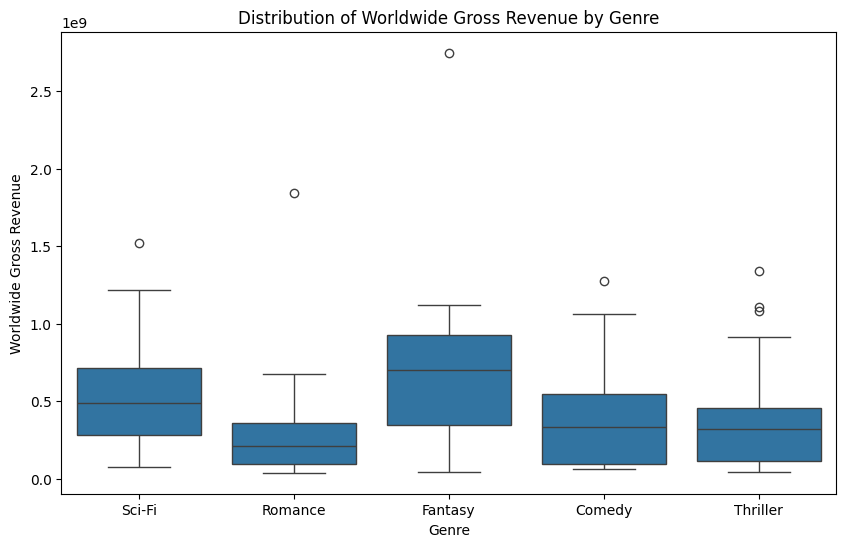

In [44]:
# boxplot  Main_Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Main_Genre', y='worldwide_gross', data=top_movies)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Distribution of Worldwide Gross Revenue by Genre')
plt.show()


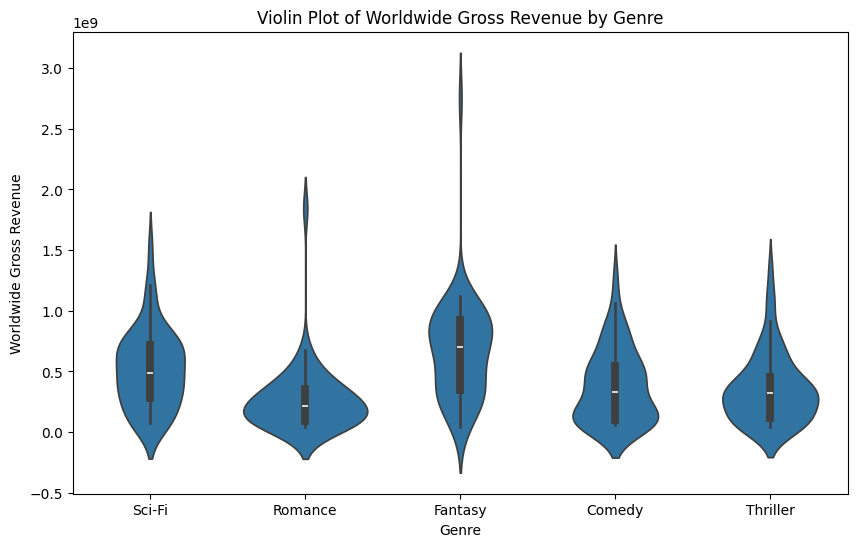

In [45]:
# violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Main_Genre', y='worldwide_gross', data=top_movies)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Violin Plot of Worldwide Gross Revenue by Genre')
plt.show()

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedeće dvije vježbe dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Kreiranje panela

- Želimo razumjeti koliko dugo traju blockbusteri u različitim žanrovima. Kada radite s velikim brojem kategorija (imamo 16 žanrova u skupu podataka o filmovima), vizualizacije se lako zatrpaju i postaje korisno izraditi ploče s malim subplotovima.

- Napravite panel 4x4 za 16 žanrova. U svakom subplotu prikažite histogram s distribucijom duljina filma za različite kategorije.

- Savjeti: koristite Matplotlib funkciju subplots

- Kojim žanrovima pripadaju i najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

In [50]:
# Izračunaj statistiku po žanrovima

# Group by 'Main_Genre' and calculate statistics
genre_stats = movies.groupby('Main_Genre')['length'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

# Rename columns for clarity
genre_stats.columns = ['Genre', 'Average Length', 'Median Length', 'Min Length', 'Max Length', 'Standard Deviation']

# Display the statistics
print(genre_stats)


        Genre  Average Length  Median Length  Min Length  Max Length  \
0      Action      130.566667          133.0         103         156   
1   Adventure      127.153846          126.0          97         163   
2   Animation       98.227273           96.5          82         118   
3      Comedy       99.400000           99.0          81         119   
4       Crime      115.235294          114.0          85         147   
5       Drama      122.900000          125.0          80         187   
6      Family      111.125000          103.0          88         150   
7     Fantasy      128.907407          132.0          83         201   
8     History      129.600000          140.0          27         195   
9      Horror      119.875000          117.5         106         135   
10      Music      116.888889          124.0          91         136   
11    Romance      118.187500          116.0          93         194   
12     Sci-Fi      129.580000          130.0          92        

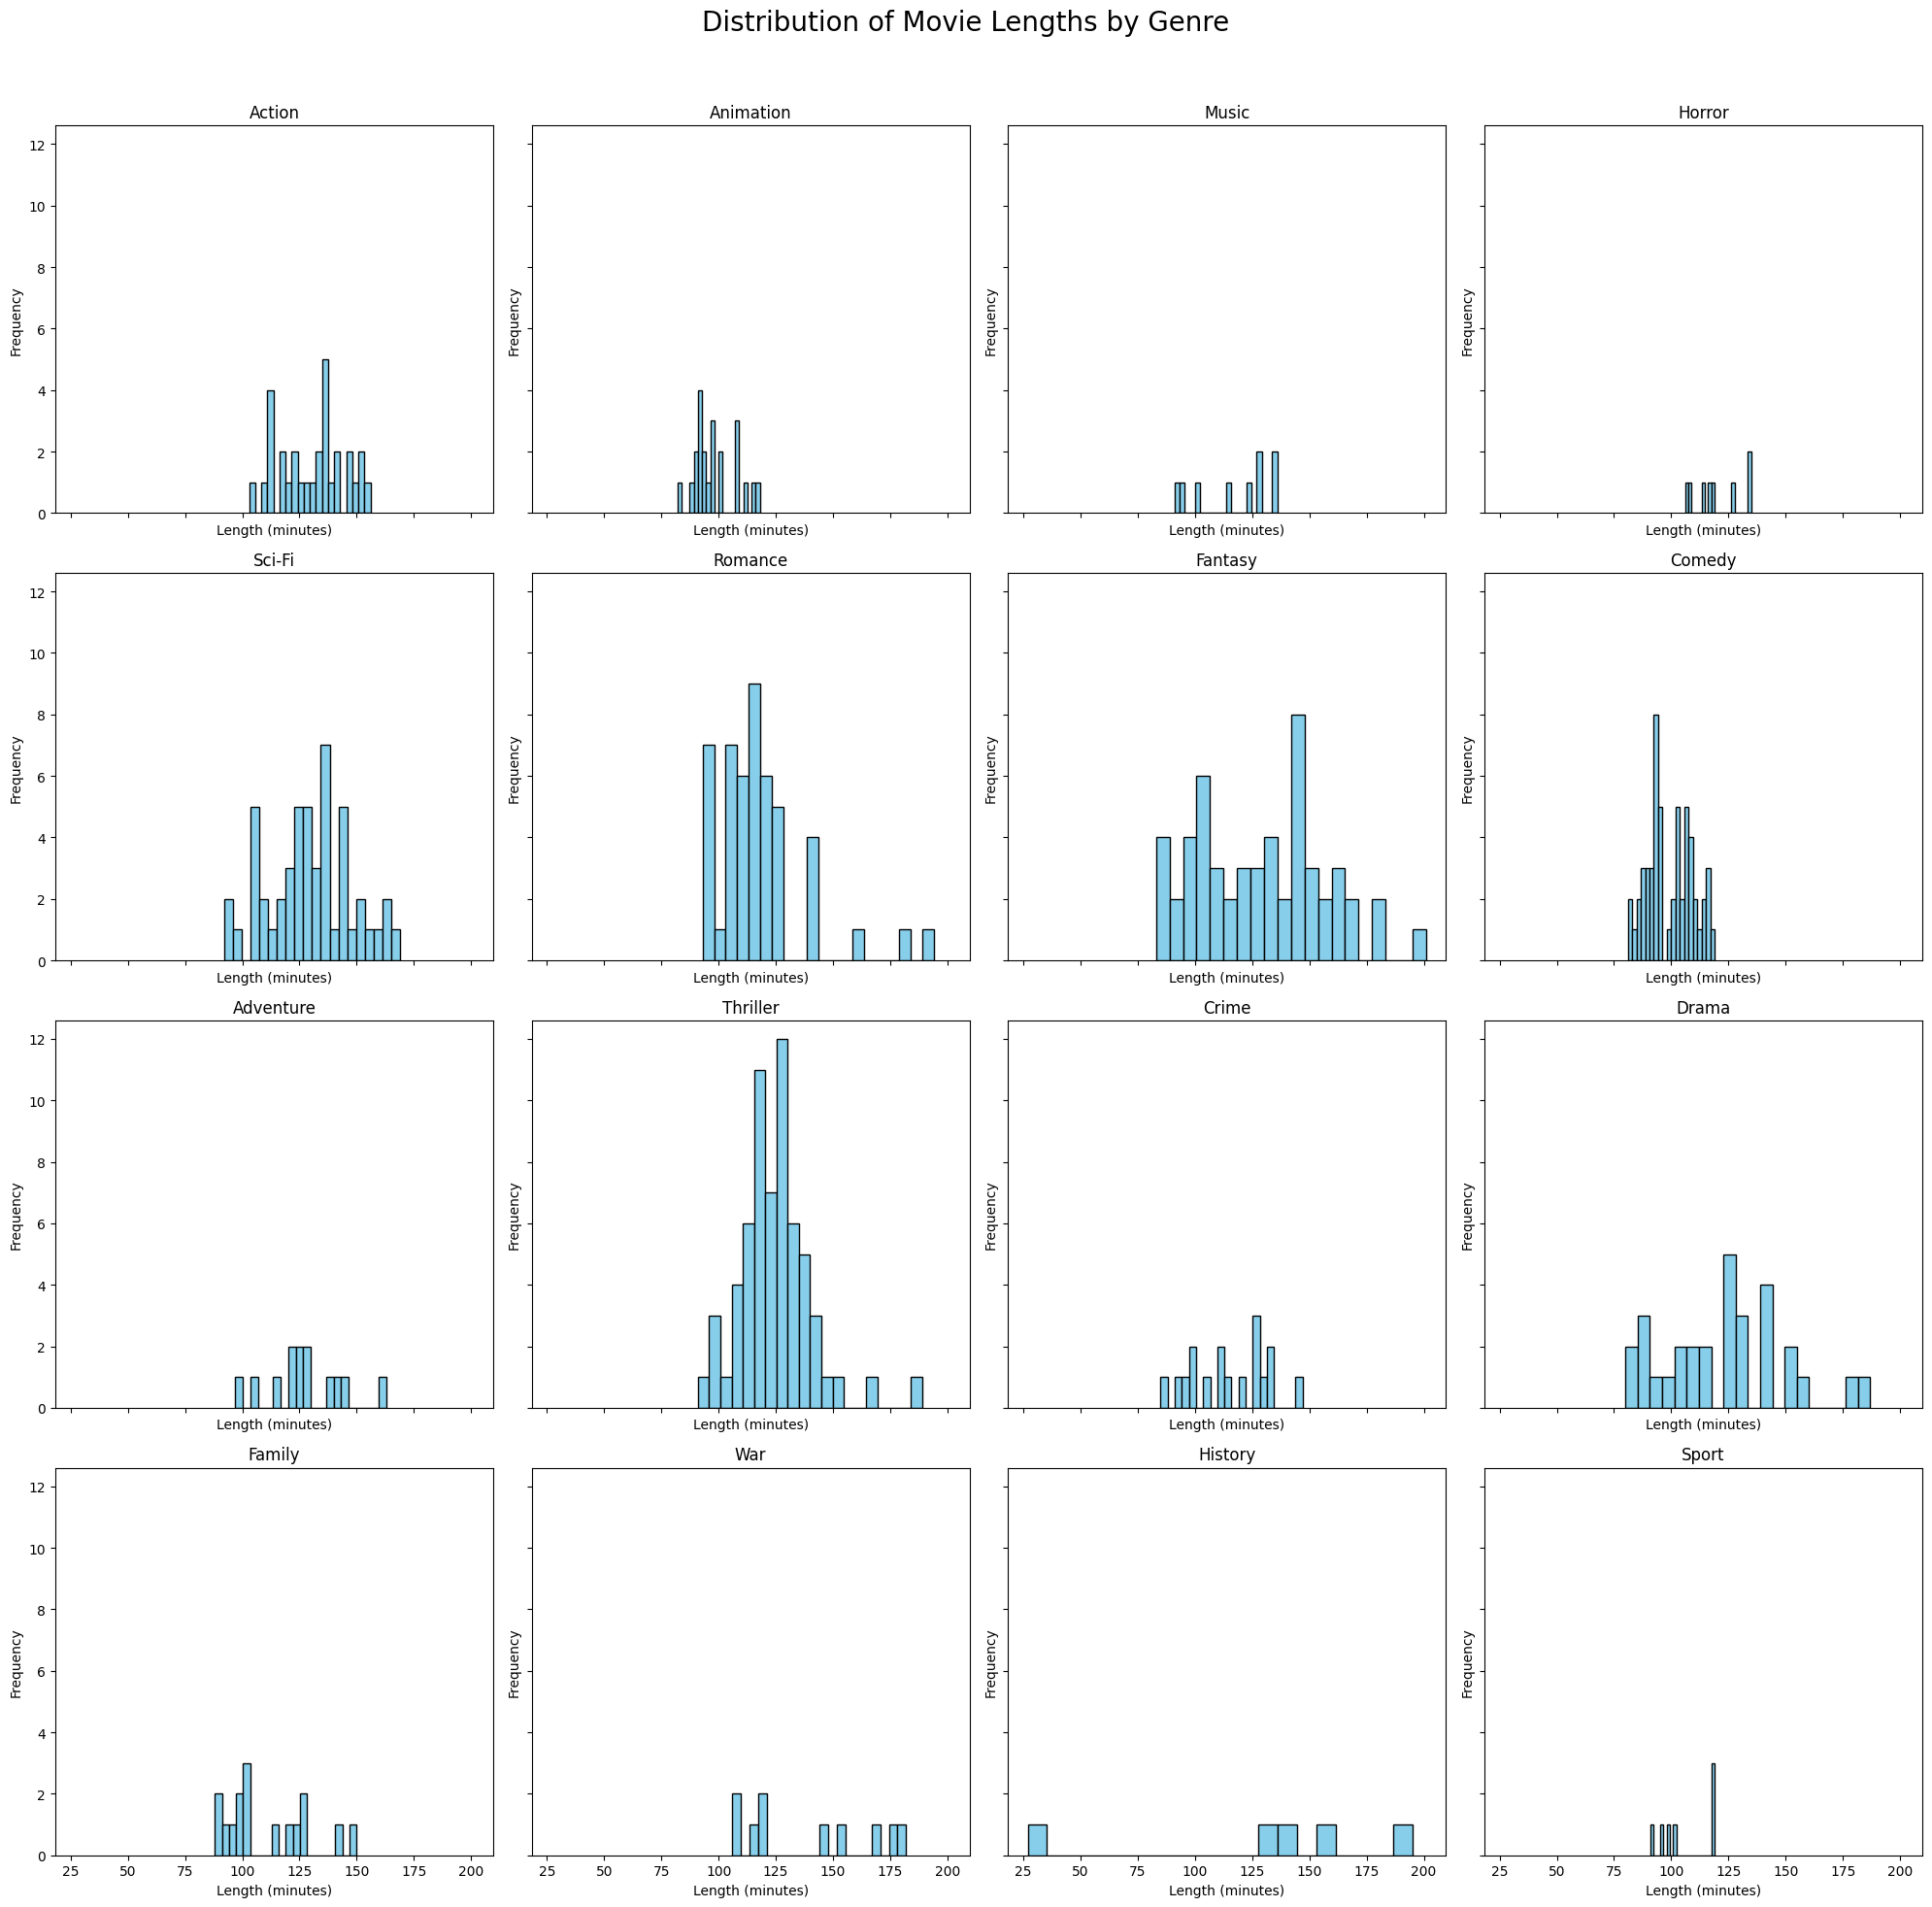

In [52]:
# Kreirajte plot sa 4x4 panela
genres = movies['Main_Genre'].unique()

fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Distribution of Movie Lengths by Genre', fontsize=20)

# Plot histograms for each genre
for ax, genre in zip(axes.flatten(), genres):
    genre_movies = movies[movies['Main_Genre'] == genre]
    ax.hist(genre_movies['length'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(genre)
    ax.set_xlabel('Length (minutes)')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(genres), 16):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2.2 Heatmape

- Koji studiji rade blockbustere u kojem žanru?

- Ima mnogo studija i mnogo žanrova. Kada radite s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s detaljnim dijagramom (kao što je barplot ili boxplot). Postaje korisno predstaviti svaki stratum jednim brojem, označenim bojom na toplinskoj karti. Takve su vizualizacije korisne za brzo razumijevanje podataka.

- Vizualizirajte broj blockbustera koje je napravio svaki studio, svakog žanra. U nastavku ćete pronaći grubu skicu. Savjet: koristite funkciju Seaborn heatmap.

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokušajte razumjeti kakav je odnos između žanrova razumijevanjem obrazaca supojavljivanja između glavnog i sekundarnog žanra. Koliki je prosječni prihod za filmove s različitim kombinacijama glavnog i drugog žanra?

- Trebali biste moći odgovoriti na sljedeća pitanja iz dvije vizualizacije: U koje žanrove spada većina filmova koje snima studio Warner Bros? Koji je najuspješniji žanr filmskih filmova Walta Disneya? Koji je studio napravio najveći broj ljubavnih blockbustera? Koja kombinacija žanrova donosi najveći prihod?


In [16]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu



In [17]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
